In [3]:
# SVM - on iris dataset

import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import GridSearchCV

# import the ML algorithm
from sklearn import svm    


# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

In [4]:
location = r"D:\\MYLEARN\\datasets\\iris.csv"

In [5]:
# load the training data from breast cancer data set
df_iris = pd.read_csv(location)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
# Check the available styles
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [22]:
plt.style.use('seaborn')

In [23]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# Means are in the same order of magnitude for all features so scaling 
# might not be beneficial. 
# If mean values were of different orders of magnitude, scaling could 
# significantly improve accuracy of a classifier.

df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris["class"] = df_iris["class"].astype('category')

df_iris.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

In [8]:
df_iris["class"] = df_iris["class"].cat.codes
df_iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
18,5.7,3.8,1.7,0.3,0
17,5.1,3.5,1.4,0.3,0
23,5.1,3.3,1.7,0.5,0
6,4.6,3.4,1.4,0.3,0
109,7.2,3.6,6.1,2.5,2
59,5.2,2.7,3.9,1.4,1
76,6.8,2.8,4.8,1.4,1
119,6.0,2.2,5.0,1.5,2
102,7.1,3.0,5.9,2.1,2
11,4.8,3.4,1.6,0.2,0


** cmap ** 
Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

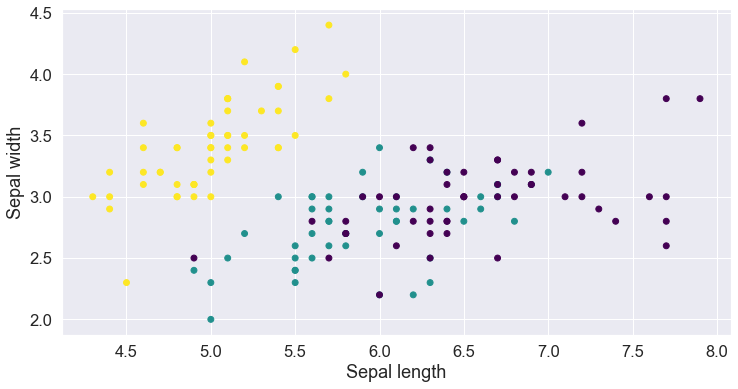

In [9]:
X = df_iris[['sepal_length', 'sepal_width']].values
y = df_iris['class'].values

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis_r', s=35)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width');
#plt.title('Sepal Width & Length');

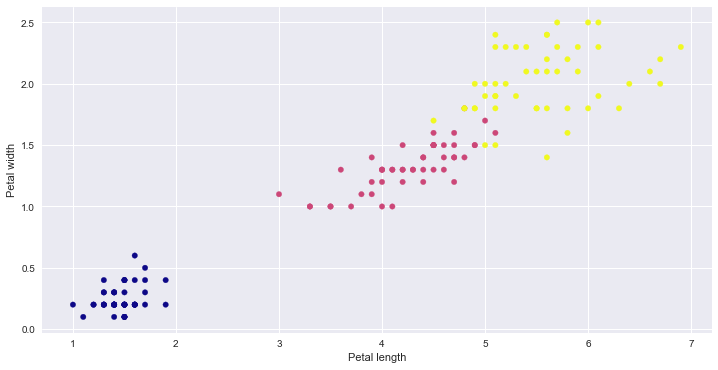

In [28]:
X2 = df_iris[['petal_length', 'petal_width']].values
y2 = df_iris['class'].values

plt.figure(figsize=(12, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='plasma', s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width');
#plt.title('Petal Width & Length')

# sklearn.svm.SVC

** Parameters:	**

__C__ : float, optional (default=1.0) - Penalty parameter C of the error term.

__kernel__ : string, optional (default=’rbf’)
            - Specifies the kernel type to be used in the algorithm. 
            - It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
            - If none is given, ‘rbf’ will be used. 

__degree__ : int, optional (default=3) 
            - Degree of the polynomial kernel function (‘poly’). 
            - Ignored by all other kernels.

__ gamma__ : float, optional (default=’auto’) 
            - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

            - Current default is ‘auto’ which uses 1 / n_features, 
            - if gamma='scale' is passed then it uses 1 / (n_features * X.var()) as value of gamma. 

__coef0__ : float, optional (default=0.0)

            - Independent term in kernel function. 
            - It is only significant in ‘poly’ and ‘sigmoid’.

__max_iter__ : int, optional (default=-1)

            - Hard limit on iterations within solver, or -1 for no limit.

__decision_function_shape __ : ‘ovo’, ‘ovr’, default=’ovr’
            - Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.



# Find best parameters and fit the model

## 1.  SVC with linear kernel

In [10]:
# Set the parameters by cross-validation

tuned_params_SVC_linear = [{'kernel': ['linear', 'rbf'], 
                            'gamma': ['auto', 'scale'],
                            'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

In [30]:
# instantiate the Grid Search object
grid = GridSearchCV(estimator = svm.SVC(), 
                   param_grid = tuned_params_SVC_linear, 
                   cv         = 5,
                   scoring    = 'accuracy')

In [31]:
# fit the grid search object
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear', 'rbf'], 'gamma': ['auto', 'scale'], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
print("Best parameters set found on development set:")
print(grid.best_params_)

Best parameters set found on development set:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [17]:
# instantiate and fit the linear SVC model
svc = svm.SVC(C=10, 
              kernel='linear', 
              gamma='scale',
              max_iter=3000).fit(X, y)

## 2.  LinearSVC (linear kernel)

__svm.LinearSVC__
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

** Parameters:	 **

__penalty__ : string, ‘l1’ or ‘l2’ (default=’l2’)
Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

__C__ : float, optional (default=1.0) - Penalty parameter C of the error term.

__multi_class__ : string, ‘ovr’ or ‘crammer_singer’ (default=’ovr’)
Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty and dual will be ignored.



In [18]:
svm.LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [19]:
tuned_params_LinearSVC  = [{'penalty': ['l1', 'l2'], 
                            'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],
                            'dual': [False],
                            'max_iter': [50000]}
                   ]

# instantiate the Grid Search object
grid = GridSearchCV(estimator = svm.LinearSVC(), 
                   param_grid = tuned_params_LinearSVC, 
                   cv         = 5,
                   scoring    = 'accuracy')

# fit the grid search object
grid.fit(X, y)

print("Best parameters set found on development set:")
print(grid.best_params_)

Best parameters set found on development set:
{'C': 10, 'dual': False, 'max_iter': 50000, 'penalty': 'l1'}


In [24]:
# instatiate and fit the linear SVC model
lin_svc = svm.LinearSVC(C=10, 
                        penalty='l1',
                        dual=False,
                        max_iter=50000).fit(X, y)

## 3. RBF

In [32]:
tuned_params_RBF  = [{'kernel': ['rbf'], 
                     'gamma': ['auto', 'scale'],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],
                     'max_iter': [50000]}
                   ]

# instantiate the Grid Search object
grid = GridSearchCV(estimator = svm.SVC(), 
                   param_grid = tuned_params_RBF, 
                   cv         = 5,
                   scoring    = 'accuracy')

# fit the grid search object
grid.fit(X, y)

print("Best parameters set found on development set:")
print(grid.best_params_)

Best parameters set found on development set:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 50000}


In [208]:
# SVC with RBF kernel
svc_rbf = svm.SVC(C=10, 
                  kernel='rbf', 
                  gamma='scale', 
                  max_iter=50000).fit(X, y)

## 4. Polynominal

In [33]:
# Scaling matters here
# notice the best_params with and without scaling (also the processing time)
# Iterations take too long 
# setting max_iter = -1 would cause FOREVER loop , sort of

scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [34]:
tuned_params_poly  = [{'kernel': ['poly'], 
                     'gamma': ['auto', 'scale'],
                     'degree': [2, 3, 4 , 5, 6, 7, 8, 9, 10],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],
                     'max_iter': [100000]}
                   ]

# instantiate the Grid Search object
grid = GridSearchCV(estimator = svm.SVC(), 
                   param_grid = tuned_params_poly, 
                   cv         = 5,
                   scoring    = 'accuracy')

# fit the grid search object
grid.fit(scaled_X, y)

print("Best parameters set found on development set:")
print(grid.best_params_)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solv

Best parameters set found on development set:
{'C': 1000, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 100000}


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [200]:
# SVC with RBF kernel
svc_poly = svm.SVC(C=1000, 
                  kernel='poly', 
                  degree=5,
                  gamma='scale', 
                  max_iter=-1).fit(scaled_X, y)

# Metrics

In [215]:
# Making Predictions (SVC with linear)
y_pred = svc.predict(X)  

print(confusion_matrix(y, y_pred))  
print(accuracy_score(y, y_pred))  
print(classification_report(y, y_pred)) 

[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]
0.82
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.76      0.74        50
           2       0.74      0.70      0.72        50

   micro avg       0.82      0.82      0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



In [216]:
# Making Predictions (linearSVC)
y_pred = lin_svc.predict(X)  

print(confusion_matrix(y, y_pred))  
print(accuracy_score(y, y_pred))  
print(classification_report(y, y_pred)) 

[[49  1  0]
 [ 0 33 17]
 [ 0 11 39]]
0.8066666666666666
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.73      0.66      0.69        50
           2       0.70      0.78      0.74        50

   micro avg       0.81      0.81      0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



In [217]:
# Making Predictions (RBF)
y_pred = svc_rbf.predict(X)  

print(confusion_matrix(y, y_pred))  
print(accuracy_score(y, y_pred))  
print(classification_report(y, y_pred)) 

[[50  0  0]
 [ 0 36 14]
 [ 0 14 36]]
0.8133333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.72      0.72        50
           2       0.72      0.72      0.72        50

   micro avg       0.81      0.81      0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



In [218]:
# Making Predictions (POLY)
y_pred = svc_poly.predict(scaled_X)  

print(confusion_matrix(y, y_pred))  
print(accuracy_score(y, y_pred))  
print(classification_report(y, y_pred))  

[[50  0  0]
 [ 0 47  3]
 [ 0 33 17]]
0.76
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.59      0.94      0.72        50
           2       0.85      0.34      0.49        50

   micro avg       0.76      0.76      0.76       150
   macro avg       0.81      0.76      0.74       150
weighted avg       0.81      0.76      0.74       150



# Visualization (decision region)

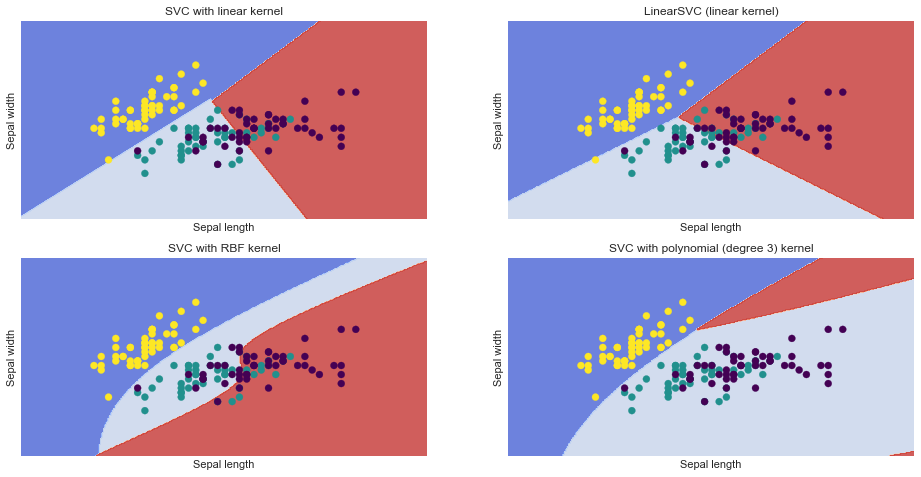

In [220]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(16, 8))

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    #plt.subplots_adjust(wspace=1, hspace=1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis_r')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


## there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.